In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
# import opendatasets as od
import os
from zipfile import ZipFile

from plotly.subplots import make_subplots
import plotly.graph_objects as go


import plotly.express as px

%matplotlib inline

In [2]:
walmart = pd.read_csv('./train.csv')
stores = pd.read_csv('./store.csv')
features = pd.read_csv('./features.csv')
# testing = pd.read_csv('./test.csv')

stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
 3   DMA     45 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.5+ KB


In [3]:
features.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace = True)

Removing our NULL/NA values from our dataframes prior to merging our 3 datasets into a single larger dataset

In [4]:
merged = walmart.merge(stores, how='left').merge(features, how='left')
# testing_merged = testing.merge(stores, how='left').merge(features, how='left')

In [5]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0   
    
split_date(merged) 

c:\Users\arman\anaconda3\envs\AML\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\arman\anaconda3\envs\AML\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\arman\anaconda3\envs\AML\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/03/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\arman\anaconda3\envs\AML\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/03/2010' in DD/MM/Y

In [6]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   DMA           421570 non-null  object        
 8   Temperature   265245 non-null  float64       
 9   Fuel_Price    265245 non-null  float64       
 10  CPI           265245 non-null  float64       
 11  Unemployment  265245 non-null  float64       
 12  Year          421570 non-null  int64         
 13  Month         421570 non-null  int64         
 14  Day           421570 non-null  int64         
 15  WeekOfYear    421

Our first goal is to visualize the data that groups sales by the DMA. We will do so to create some baseline understanding of what each locations total sales look like.

In [7]:
merged_subsample = merged.sample(n = 100000, random_state = 42)

In [ ]:
count = merged['DMA'].value_counts()
print(count)

count2 = stores['DMA'].value_counts()
[print(count2)]

The below plots are too much for Python to handle and cause a critical error when outputting the plots.

In [9]:
DMAsales = merged.groupby('DMA')['Weekly_Sales'].mean().reset_index()

fig = px.bar(DMAsales, x='DMA', y='Weekly_Sales', labels= {'DMA':'DMA Location', 'Weekly_Sales':'Average Weekly Sales'}, title = "Average Weekly Sales by DMA")
fig.update_traces(textposition='inside', text = round(DMAsales['Weekly_Sales']/1000, 2))
fig.show()

We can see that Houston, Orlando, and Tampa have the 3 highest average sales out of our given locations

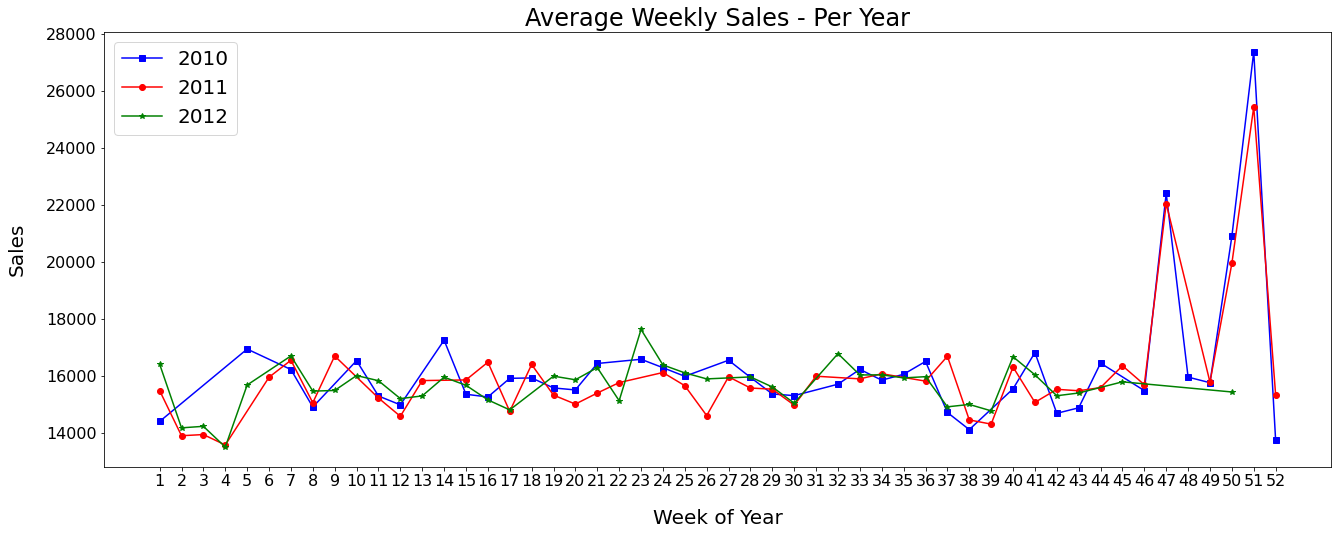

In [10]:
weekly_sales_2010 = merged[merged.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = merged[merged.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = merged[merged.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(22, 8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, 's-b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, 'o-r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales - Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20)

In [15]:
store_sales_2010 = merged[merged.Year==2010].groupby('DMA')['Weekly_Sales'].mean().to_dict()
store2010_df = pd.DataFrame(list(store_sales_2010.items()), columns=['DMA', 'AvgSales2010'])

store_sales_2011 = merged[merged.Year==2011].groupby('DMA')['Weekly_Sales'].mean().to_dict()
store2011_df = pd.DataFrame(list(store_sales_2011.items()), columns=['DMA', 'AvgSales2011'])

store_sales_2012 = merged[merged.Year==2012].groupby('DMA')['Weekly_Sales'].mean().to_dict()
store2012_df = pd.DataFrame(list(store_sales_2012.items()), columns=['DMA', 'AvgSales2012'])

fig = make_subplots(rows=3, cols=1, subplot_titles=("Average DMA Sales 2010", "Average DMA Sales 2011", "Average DMA Sales 2012"))

fig.add_trace(go.Bar(x=store2010_df.DMA, y=store2010_df.AvgSales2010,),1, 1)

fig.add_trace(go.Bar(x=store2011_df.DMA, y=store2011_df.AvgSales2011,),2, 1)

fig.add_trace(go.Bar(x=store2012_df.DMA, y=store2012_df.AvgSales2012,),3, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False, height=1500) # template='plotly_dark', showlegend=False, height=1500)

fig.update_xaxes(title_text="DMA", row=1, col=1)
fig.update_xaxes(title_text="DMA", row=2, col=1)
fig.update_xaxes(title_text="DMA", row=3, col=1)

fig.update_yaxes(title_text="AvgSales", row=1, col=1)
fig.update_yaxes(title_text="AvgSales", row=2, col=1)
fig.update_yaxes(title_text="AvgSales", row=3, col=1)

fig.update_xaxes(tick0=1, dtick=1)
fig.update_traces(textposition='inside', text = round(DMAsales['Weekly_Sales']/1000, 2))
fig.show()

,Atlanta,Austin,Charlotte,Chicago,Cleveland-Akron,Dallas-Ft.Worth,Denver,Houston,Kansas City,Los Angeles,Oralando-Daytona Brach-Melbourne FL,Philadelphia,Salt Lake City,San Diego,Tampa-St. Pete
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
421566,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
421567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
421568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## DO NOT RUN THIS CODE - IT WILL CRASH YOUR KERNEL!

In [ ]:
# fig = px.pie(merged, values = 'Weekly_Sales', names = 'DMA' ,title = 'Weekly Sales per DMA',  labels = {'DMA':'DMA', 'Weekly_Sales':'Weekly Sales'})
# fig.show()

# fig2 = px.bar(merged, x = 'DMA', y = 'Weekly_Sales', color = 'DMA', title = 'Weekly Sales per DMA')
# fig2.show()